# Imports

In [59]:
import pandas as pd; import seaborn as sb; import statsmodels.formula.api as smf; import pingouin;
from itertools import combinations; import os; from analysis_helpers import *; 
import scipy; from scipy import stats; import os; import math; import warnings
warnings.filterwarnings('ignore')

# Load and organize data

In [60]:
gaze  = pd.read_csv('../parsed_data/full_gaze.csv')
behav = pd.read_csv('../parsed_data/full_behavioral.csv')

In [61]:
gaze['av_x_coord'] = gaze['av_x_coord']*(59.8/2048)
gaze['av_y_coord'] = gaze['av_y_coord']*(33.6/1152)

gaze = gaze[(gaze['av_x_coord']   < 59.8) 
                                  & (gaze['av_y_coord'] < 33.6)
                                  & (gaze['av_x_coord'] > 0)
                                  & (gaze['av_y_coord'] > 0)]

# Tendency to gaze towards cued side

In [62]:
# group gaze data
gaze_grp = gaze.groupby(['UniqueID','Run','Trial'], as_index=False).mean()
gaze_group_full = gaze.groupby(['UniqueID','Run','Trial','Experiment'], as_index=False).mean()

# add av x coord to each presentation trial in behavioral df
for s in gaze_grp['UniqueID'].unique():             
    for r in gaze_grp[gaze_grp['UniqueID']==s]['Run'].unique():
        for t in gaze_grp[(gaze_grp['UniqueID']==s) & (gaze_grp['Run']==r)]['Trial'].unique():
            if gaze_grp[(gaze_grp['UniqueID']==s) & (gaze_grp['Run']==r) & (gaze_grp['Trial']==t)].shape[0]>0:
                behav.loc[(behav['UniqueID']==s) 
                             & (behav['Run']==r) 
                             & (behav['Trial']==t), 'av_x_coord'] =  gaze_grp[(gaze_grp['UniqueID']==s) 
                                                                             & (gaze_grp['Run']==r) 
                                                                             & (gaze_grp['Trial']==t)]['av_x_coord'].item()

# compute av x gaze's difference from screen center
behav['gaze_from_center'] = behav['av_x_coord'] - 59.8/2

# make the difference value negative for opposite facing arrow
behav['gaze_towards_cued_side'] = behav['gaze_from_center']
behav.loc[(behav['Cued Side']=='<'),'gaze_towards_cued_side'] = -behav.loc[(behav['Cued Side']=='<')]['gaze_towards_cued_side']

In [63]:
for exp in ['/sustain','/variabl']:
    
    # ttest relative to zero drift! 
    behav_1 = behav[(behav['Experiment']==exp) & (behav['Trial Type']=='Presentation')]
    behav_grp = behav_1.groupby(['UniqueID'], as_index=False).mean()
    print(scipy.stats.ttest_1samp(behav_grp['gaze_towards_cued_side'],0))
    print(np.mean(behav_grp['gaze_towards_cued_side'])/np.std(behav_grp['gaze_towards_cued_side']))
    print()

Ttest_1sampResult(statistic=3.6110305466537524, pvalue=0.0006306585053386894)
0.4701161343873412

Ttest_1sampResult(statistic=2.8645929302250357, pvalue=0.006009788669403545)
0.3972475651253079



In [ ]:
# Ultimately want df with UniqueID, Run#, Pres Trial #, Attn Level, Av_x_coord, and Rating

# Data Restricted to Gaze Between Participants

In [107]:
gaze_elims    = gaze[abs(gaze['gaze_from_center'])>=4.2752]
grouped_elims = gaze_elims.groupby(['UniqueID','Run','Trial'], as_index=False).mean()

In [115]:
grouped_elims[(grouped_elims['UniqueID']==0) & (grouped_elims['Run']==0) & (grouped_elims['Trial']==0)].index.item()

0

In [119]:
gaze['UniqueID']

0            0
1            0
2            0
3            0
4            0
          ... 
1065323    112
1065324    112
1065325    112
1065326    112
1065327    112
Name: UniqueID, Length: 1020203, dtype: int64

In [120]:
gaze_elims    = gaze[abs(gaze['gaze_from_center'])>=4.2752]
grouped_elims = gaze_elims.groupby(['UniqueID','Run','Trial'], as_index=False).mean()
indices = []

for s in grouped_elims['UniqueID'].unique():
    for r in grouped_elims[grouped_elims['UniqueID']==s]['Run'].unique():
        for t in grouped_elims[(grouped_elims['UniqueID']==s) & (grouped_elims['Run']==r)]['Trial'].unique():
            
#             something about adding the gaze info to memory trials
#             add_gaze function?
            
            images.append(behav[(behav['UniqueID']==s) & (behav['Run']==r) & (behav['Trial']==t)
                               (behav['Trial Type']=='Presentation') & ()].index.item())

#gaze_elims[['UniqueID', 'Run', 'Trial']].head()

ValueError: can only convert an array of size 1 to a Python scalar

In [121]:
gaze['gaze_from_center'] = gaze['av_x_coord'] - (59.8/2)
    
gaze_restricted = gaze[abs(gaze['gaze_from_center'])<4.2752]
# NO, need to pick the runs and trials where no numbers out of this range

gaze_elims = gaze[abs(gaze['gaze_from_center'])>=4.2752]


# gaze_restricted = gaze_restricted.groupby(['Subject','Run','Trial','Experiment'], as_index=False).mean()
    
restricted_behavioral = []

for s in gaze_restricted['UniqueID'].unique():
    for r in gaze_restricted[gaze_restricted['UniqueID']==s]['Run'].unique():
        for t in gaze_restricted[(gaze_restricted['UniqueID']==s) & (gaze_restricted['Run']==r)]['Trial'].unique():
            restricted_behavioral.append(behav[(behav['UniqueID']==s) & (behav['Run']==int(r)) & (behav['Trial']==float(t))])
            
restricted_concat = pd.concat(restricted_behavioral)

In [122]:
# make the difference value negative for opposite facing arrow
restricted_concat['gaze_towards_cued_side'] = restricted_concat['gaze_from_center']
restricted_concat.loc[(restricted_concat['Cued Side']=='<'),'gaze_towards_cued_side'] = -restricted_concat.loc[(restricted_concat['Cued Side']=='<')]['gaze_towards_cued_side']
# restricted_pres = restricted_concat[restricted_concat['Trial Type']=='Presentation']

array([nan])

# Attended Category vs Unattended Images

In [66]:
# d = restricted_pres

# for exp in ['/sustain','/variabl']:
    
#     Cats = []
#     Novs = []

#     for s in d[d['Experiment']==exp]['Subject'].unique():
#         Cats.append(d[(d['Subject']==s) & (d['Attention Level'].isin(['Category','Full'])) & (d['Experiment']==exp)]['Familiarity Rating'].mean())
#         Novs.append(d[(d['Subject']==s) & (d['Attention Level']=='None') & (d['Experiment']==exp)]['Familiarity Rating'].mean())

#     print(l)
#     print(scipy.stats.ttest_rel(Cats, Novs))
#     print(cohen_d(Cats, Novs))
#     print()

# Attended Side vs Unattended Images

In [67]:
# for l in restricted_concat.keys():
#     d = restricted_concat[l]

#     Sides = []
#     Novs = []
    
#     for s in d['Subject'].unique():

#         Sides.append(d[(d['Subject']==s) & (d['Attention Level'].isin(['Full','Side']))]['Familiarity Rating'].mean())
#         Novs.append(d[(d['Subject']==s) & (d['Attention Level']=='None')]['Familiarity Rating'].mean())


#     print(scipy.stats.ttest_rel(Sides, Novs))
#     print(cohen_d(Sides, Novs))
#     print()

# Plot

In [77]:
gaze_added_mem_dict = {}
gaze_added_mem = []

#data = restricted_concat

for exp in ['/sustain','/variabl']:
    
    data = restricted_concat[restricted_concat['Experiment']==exp]
    
    for s in data['UniqueID'].unique():
        print(s)
        for r in data[data['UniqueID']==s]['Run'].unique():
            gaze_added_mem.append(add_gaze(data[(data['UniqueID']==s) & (data['Run']==r)]))

    gaze_mem = pd.concat(gaze_added_mem)
    gaze_mem.loc[gaze_mem['Attention Level']=='Novel','av_x_coord']=0

    gaze_mem['gaze_towards'] = gaze_mem['av_x_coord'] - (59.8/2)

    gaze_mem.loc[(gaze_mem['Cued Side']=='<') 
                 & (gaze_mem['Attention Level'].isin(['Full', 'Side'])), 'gaze_towards'] = -gaze_mem[(gaze_mem['Cued Side']=='<') 
                                                                                                          & (gaze_mem['Attention Level'].isin(['Full', 'Side']))]['gaze_towards']

    gaze_mem.loc[(gaze_mem['Cued Side']=='>') 
                 & (gaze_mem['Attention Level'].isin(['None', 'Category'])), 'gaze_towards'] = -gaze_mem[(gaze_mem['Cued Side']=='>') & (gaze_mem['Attention Level'].isin(['None', 'Category']))]['gaze_towards']

    gaze_mem_grp = gaze_mem.groupby(['Subject','Attention Level', 'Familiarity Rating','Trial Type'], as_index=False).mean()

    gaze_added_mem_dict[exp] = gaze_mem
    

# for data,label in zip([exp1, exp2],['exp1','exp2']):
#     print(label)

#     for s in data['Subject'].unique():
#         print(s)
#         for r in data['Run'].unique():
#             gaze_added_mem.append(add_gaze(data[(data['Subject']==s) & (data['Run']==r)]))

#     gaze_mem = pd.concat(gaze_added_mem)
#     gaze_mem.loc[gaze_mem['Attention Level']=='Novel','av_x_coord']=0

#     gaze_mem['gaze_towards'] = gaze_mem['av_x_coord'] - (59.8/2)

#     gaze_mem.loc[(gaze_mem['Cued Side']=='<') 
#                  & (gaze_mem['Attention Level'].isin(['Full', 'Side'])), 'gaze_towards'] = -gaze_mem[(gaze_mem['Cued Side']=='<') 
#                                                                                                           & (gaze_mem['Attention Level'].isin(['Full', 'Side']))]['gaze_towards']

#     gaze_mem.loc[(gaze_mem['Cued Side']=='>') 
#                  & (gaze_mem['Attention Level'].isin(['None', 'Category'])), 'gaze_towards'] = -gaze_mem[(gaze_mem['Cued Side']=='>') & (gaze_mem['Attention Level'].isin(['None', 'Category']))]['gaze_towards']

#     gaze_mem_grp = gaze_mem.groupby(['Subject','Attention Level', 'Familiarity Rating','Trial Type'], as_index=False).mean()

#     gaze_added_mem_dict[label] = gaze_mem

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112


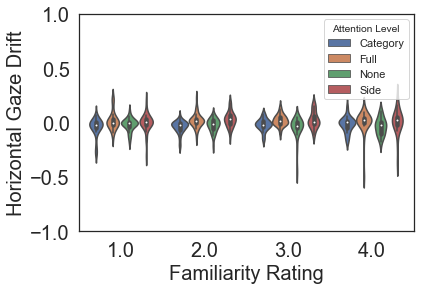

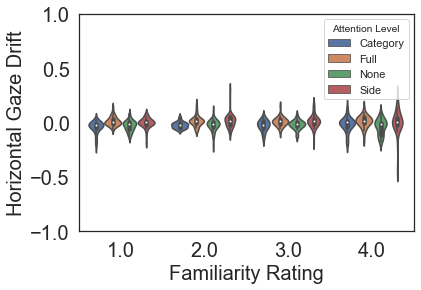

In [78]:
%matplotlib inline
for exp in ['/sustain','/variabl']:
    
    gaze_mem_grp = gaze_added_mem_dict[exp].groupby(['Subject','Attention Level', 'Familiarity Rating','Trial Type'], as_index=False).mean()

    # scale by screen size
    gaze_mem_grp['scaled_gaze_towards'] = gaze_mem_grp['gaze_towards']/(59.8/2)

    # plot
    sb.set_style('white')

    f = sb.violinplot(x='Familiarity Rating', y='scaled_gaze_towards', 
                  data=gaze_mem_grp[gaze_mem_grp['Attention Level']!='Novel'], hue='Attention Level')

    plt.grid(False)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.xlabel('Familiarity Rating',    fontsize = 20)
    plt.ylabel('Horizontal Gaze Drift', fontsize = 20)
    f.set(ylim=(-1, 1))
    plt.show()

In [79]:
gaze_added_mem_dict = {}
gaze_added_mem = []

#data = restricted_concat

for exp in ['/sustain','/variabl']:
    
    data = behav #restricted_concat[restricted_concat['Experiment']==exp]
    
    for s in data[data['Experiment']==exp]['UniqueID'].unique():
        print(s)
        for r in data[data['UniqueID']==s]['Run'].unique():
            gaze_added_mem.append(add_gaze(data[(data['UniqueID']==s) & (data['Run']==r)]))

    gaze_mem = pd.concat(gaze_added_mem)
    gaze_mem.loc[gaze_mem['Attention Level']=='Novel','av_x_coord']=0

    gaze_mem['gaze_towards'] = gaze_mem['av_x_coord'] - (59.8/2)

    gaze_mem.loc[(gaze_mem['Cued Side']=='<') 
                 & (gaze_mem['Attention Level'].isin(['Full', 'Side'])), 'gaze_towards'] = -gaze_mem[(gaze_mem['Cued Side']=='<') 
                                                                                                          & (gaze_mem['Attention Level'].isin(['Full', 'Side']))]['gaze_towards']

    gaze_mem.loc[(gaze_mem['Cued Side']=='>') 
                 & (gaze_mem['Attention Level'].isin(['None', 'Category'])), 'gaze_towards'] = -gaze_mem[(gaze_mem['Cued Side']=='>') & (gaze_mem['Attention Level'].isin(['None', 'Category']))]['gaze_towards']

    gaze_mem_grp = gaze_mem.groupby(['Subject','Attention Level', 'Familiarity Rating','Trial Type'], as_index=False).mean()

    gaze_added_mem_dict[exp] = gaze_mem

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112


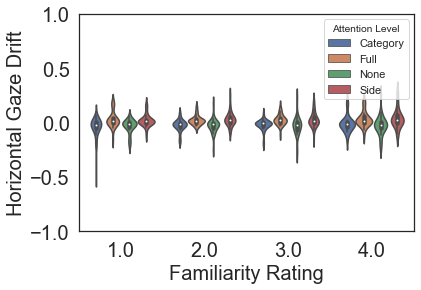

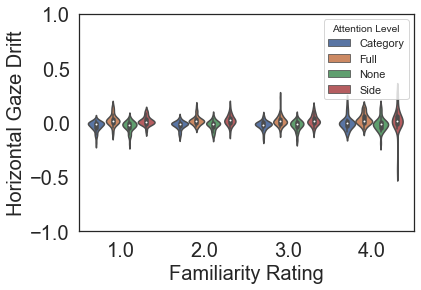

In [80]:
%matplotlib inline
for exp in ['/sustain','/variabl']:
    
    gaze_mem_grp = gaze_added_mem_dict[exp].groupby(['Subject','Attention Level', 'Familiarity Rating','Trial Type'], as_index=False).mean()

    # scale by screen size
    gaze_mem_grp['scaled_gaze_towards'] = gaze_mem_grp['gaze_towards']/(59.8/2)

    # plot
    sb.set_style('white')

    f = sb.violinplot(x='Familiarity Rating', y='scaled_gaze_towards', 
                  data=gaze_mem_grp[gaze_mem_grp['Attention Level']!='Novel'], hue='Attention Level')

    plt.grid(False)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.xlabel('Familiarity Rating',    fontsize = 20)
    plt.ylabel('Horizontal Gaze Drift', fontsize = 20)
    f.set(ylim=(-1, 1))
    plt.show()

# Graveyard

In [80]:
behavioral['number_of_gazepoints'] = np.nan
nums_per_trial = []

for subject in gaze['UniqueID'].unique():
    print(subject)
    for run in gaze['Run'].unique():
        for trial in gaze['Trial'].unique():
            # points_per_trail = gaze[(gaze['UniqueID']==subject)&(gaze['Run']==run)&(gaze['Trial']==trial)].shape[0]
            behavioral.loc[(behavioral['UniqueID']==subject) & (behavioral['Run']==run)
                          & (behavioral['Trial']==trial) & (behavioral['Trial Type']=='Presentation'), 'number_of_gazepoints'] = gaze[(gaze['UniqueID']==subject)&(gaze['Run']==run)&(gaze['Trial']==trial)].shape[0]

#             if gaze[(gaze['UniqueID']==subject)&(gaze['Run']==run)&(gaze['Trial']==trial)].shape[0] == 0:
#                 print(gaze[(gaze['UniqueID']==subject)&(gaze['Run']==run)&(gaze['Trial']==trial)]['Subject'].unique())
#                 print('zero gaze points for subject '+str(subject)+' in run '+str(run)+', trial '+str(trial))
#                 print(gaze[(gaze['UniqueID']==subject)&(gaze['Run']==run)&(gaze['Trial']==trial)]['Subject'])
#                 print()
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112


In [82]:
#behavioral[behavioral['number_of_gazepoints']>0]
#['number_of_gazepoints'].unique()

In [83]:
# import seaborn as sb
# dat = [x for x in list(behavioral['number_of_gazepoints']) if x < 125 and x > 70]
# #sb.violinplot(data=dat)
# sb.boxplot(data=dat)

In [84]:
# behavioral[behavioral['number_of_gazepoints']>900]

In [85]:
# missing_gaze = behavioral[(behavioral['number_of_gazepoints']<20) & 
#                     (behavioral['Trial Type'] == 'Presentation')]#[['Experiment','Group','Subject','Run','Trial','UniqueID']]

In [86]:
# c = missing_gaze.groupby(['Experiment','Group','UniqueID','Run','Trial'], as_index=False).count()
# c

# missing_gaze

In [87]:
# 94/(30*10*8)

In [88]:
# missing_gaze.groupby(['Experiment','Group'], as_index=False).count()

In [12]:
#counts[counts['Trial']==10].groupby(['Experiment','Group'], as_index=False).count()

In [13]:
#counts[counts['Trial']==10]

In [14]:
#counts = missing_gaze.groupby(['Experiment','Group','UniqueID','Subject','Run','Trial'],as_index=False).count()

#counts[counts['Trial']<10].groupby(['Experiment','Group'],as_index=False).sum()

In [89]:
# behavioral

In [90]:
# tally = {'sust_run':[], 'sust_partial':[]}

# for s in missing_gaze['UniqueID'].unique():
#     sub = missing_gaze[missing_gaze['UniqueID'] == s]
#     for r in sub['Run'].unique():
#         run = sub[sub['Run']==r]
#         print('Sub: '+str(sub['Subject'].unique())+', Run: '+str(r)+ ', Group: '+ str(run['Group'].unique()) +', Exp: '+str(run['Experiment'].unique()))
#         print(run['Trial'].unique())
        
        
        
#         print()

In [17]:
# for each subject and for each run and trial, check to see if there are any gazepoints at all


In [91]:
# for s in behavioral[(behavioral['number_of_gazepoints']<10) & 
#                     (behavioral['Trial Type'] == 'Presentation')]['UniqueID'].unique():
    
#     print(behavioral[(behavioral['number_of_gazepoints']<10) & 
#                     (behavioral['Trial Type'] == 'Presentation') &
#                     (behavioral['UniqueID'] == s)]['Trial'])

In [19]:
# behavioral['number_of_gazepoints']

In [92]:
behavioral.loc[behavioral['Trial Type']=='Presentation','Cued Face'] = behavioral[behavioral['Trial Type']=='Presentation']['Cued Composite'].str.split('_',n=1, expand=True)[0]
behavioral.loc[behavioral['Trial Type']=='Presentation','Cued Place'] = behavioral[behavioral['Trial Type']=='Presentation']['Cued Composite'].str.split('_',n=1, expand=True)[1]
behavioral.loc[behavioral['Trial Type']=='Presentation','Uncued Face'] = behavioral[behavioral['Trial Type']=='Presentation']['Uncued Composite'].str.split('_',n=1, expand=True)[0]
behavioral.loc[behavioral['Trial Type']=='Presentation','Uncued Place'] = behavioral[behavioral['Trial Type']=='Presentation']['Uncued Composite'].str.split('_',n=1, expand=True)[1]

In [93]:
behavioral.loc[behavioral['Trial Type']=='Presentation','Cued Face'] = behavioral[behavioral['Trial Type']=='Presentation']['Cued Face']+'.jpg'

In [94]:
behavioral.loc[behavioral['Trial Type']=='Presentation','Uncued Face'] = behavioral[behavioral['Trial Type']=='Presentation']['Uncued Face']+'.jpg'

In [95]:
gaze.head(n=2)

,Unnamed: 0,Unnamed: 0.1,avg,fix,lefteye,raw,righteye,state,time,timestamp,...,xRaw_lefteye,yRaw_lefteye,av_x_coord,av_y_coord,Subject,UniqueID,Group,Experiment,Trial,Run
0,0,43696,"{'x': 1041.042, 'y': 501.128}",True,"{'avg': {'x': 989.74, 'y': 494.5082}, 'pcenter...","{'x': 1029.6586, 'y': 493.4627}","{'avg': {'x': 1092.8706, 'y': 545.1093}, 'pcen...",7,994163077,1.538592e+09,...,989.0439,458.6258,1029.65855,493.4627,10,0,1,/sustain,0.0,3
1,1,43697,"{'x': 1039.5768, 'y': 503.2538}",True,"{'avg': {'x': 989.9557, 'y': 494.9846}, 'pcent...","{'x': 1040.4014, 'y': 537.1355}","{'avg': {'x': 1092.2872, 'y': 546.3817}, 'pcen...",7,994163112,1.538592e+09,...,993.0250,508.4023,1040.40140,537.1355,10,0,1,/sustain,0.0,3


In [96]:
behavioral.head(n=2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,...,Rating History,Stimulus Onset,Stimulus End,Attention Probe,Trial,UniqueID,Group,Experiment,Last Cued,number_of_gazepoints
0,0,0,150,10,Presentation,3,00926960627Fa_sunapqwoeotxshkukbh.jpg,00076931230fa_sunaafewhewbxmjiurz.jpg,00926960627Fa.jpg,sunapqwoeotxshkukbh.jpg,...,NaN,1.538592e+09,1.538592e+09,x,0.0,0,1,/sustain,NaN,83.0
1,1,1,151,10,Presentation,3,00725941201fa_sunaefgzwiramypjvtd.jpg,00828940307fa_sunahuynahneraqftyz.jpg,00725941201fa.jpg,sunaefgzwiramypjvtd.jpg,...,NaN,1.538592e+09,1.538592e+09,o,1.0,0,1,/sustain,NaN,82.0


In [97]:
def add_gaze(df):

    '''
    input: df containing pres and mem from single run
    output: df with string in 'Attention Level' column in each Memory trial row
    '''

    for index,row in df.iterrows():
        if row['Trial Type']=='Memory':
            mem_image = row['Memory Image']
            for cue in ['Cued ', 'Uncued ']:
                for cat in ['Face', 'Place']:
                    if df.loc[df[cue+cat] == mem_image].shape[0]!=0:
                        df['av_x_coord'][index]=df.loc[df[cue+cat] == mem_image]['av_x_coord']
                        df['Cued Side'][index] = df.loc[df[cue+cat] == mem_image]['Cued Side'].item()

    mem_mask = df['Trial Type']=='Memory'
    df.loc[mem_mask,'av_x_coord'] = df.loc[mem_mask,'av_x_coord'].fillna(np.nan)

    return(df)

# Gaze Plots

In [98]:
# behavioral[(behavioral['av_x_coord'].isnull()) 
#           &(behavioral['Trial Type'] == 'Presentation') 
#           & (behavioral['Group'] != 2)]

In [99]:
# convert to cm

gaze['av_x_coord'] = (59.8/2048)*(gaze[['xRaw_righteye', 'xRaw_lefteye']].mean(axis=1))
gaze['av_y_coord'] = (33.6/1152)*(gaze[['yRaw_righteye', 'yRaw_lefteye']].mean(axis=1))

In [57]:
gaze

,Unnamed: 0,Unnamed: 0.1,avg,fix,lefteye,raw,righteye,state,time,timestamp,...,yRaw_lefteye,av_x_coord,av_y_coord,Subject,UniqueID,Group,Experiment,Trial,Run,gaze_from_center
0,0,43696,"{'x': 1041.042, 'y': 501.128}",True,"{'avg': {'x': 989.74, 'y': 494.5082}, 'pcenter...","{'x': 1029.6586, 'y': 493.4627}","{'avg': {'x': 1092.8706, 'y': 545.1093}, 'pcen...",7,994163077,1.538592e+09,...,458.6258,30.065225,14.392662,10,0,1,/sustain,0.0,3,0.165225
1,1,43697,"{'x': 1039.5768, 'y': 503.2538}",True,"{'avg': {'x': 989.9557, 'y': 494.9846}, 'pcent...","{'x': 1040.4014, 'y': 537.1355}","{'avg': {'x': 1092.2872, 'y': 546.3817}, 'pcen...",7,994163112,1.538592e+09,...,508.4023,30.378908,15.666452,10,0,1,/sustain,0.0,3,0.478908
2,2,43698,"{'x': 1039.4185, 'y': 505.6833}",True,"{'avg': {'x': 989.1204, 'y': 495.0801}, 'pcent...","{'x': 1033.1367, 'y': 523.2332}","{'avg': {'x': 1092.2155, 'y': 546.5137}, 'pcen...",7,994163156,1.538592e+09,...,498.1596,30.166783,15.260965,10,0,1,/sustain,0.0,3,0.266783
3,3,43699,"{'x': 1040.0889, 'y': 508.0482}",True,"{'avg': {'x': 988.995, 'y': 494.6188}, 'pcente...","{'x': 1036.7217, 'y': 526.7321}","{'avg': {'x': 1092.1448, 'y': 547.4536}, 'pcen...",7,994163191,1.538592e+09,...,487.0781,30.271462,15.363018,10,0,1,/sustain,0.0,3,0.371462
4,4,43700,"{'x': 1040.6561, 'y': 510.36}",True,"{'avg': {'x': 988.7053, 'y': 496.5291}, 'pcent...","{'x': 1041.6633, 'y': 540.6857}","{'avg': {'x': 1092.4565, 'y': 547.8153}, 'pcen...",7,994163224,1.538592e+09,...,525.6099,30.415756,15.770000,10,0,1,/sustain,0.0,3,0.515756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065323,6027,33197,"{'x': 1208.8556, 'y': 528.8167}",True,"{'avg': {'x': 1207.9839, 'y': 523.3488}, 'pcen...","{'x': 1204.7251, 'y': 524.0274}","{'avg': {'x': 1209.3267, 'y': 527.0235}, 'pcen...",7,553245092,1.581101e+09,...,534.0266,35.177032,15.284132,0,112,2,/variabl,9.0,7,5.277032
1065324,6028,33198,"{'x': 1208.8379, 'y': 528.4561}",True,"{'avg': {'x': 1208.0197, 'y': 524.4816}, 'pcen...","{'x': 1213.271, 'y': 521.1824}","{'avg': {'x': 1209.8717, 'y': 525.1141}, 'pcen...",7,553245126,1.581101e+09,...,543.5931,35.426567,15.201152,0,112,2,/variabl,9.0,7,5.526567
1065325,6029,33199,"{'x': 1208.8469, 'y': 528.1111}",True,"{'avg': {'x': 1207.2369, 'y': 524.196}, 'pcent...","{'x': 1207.1382, 'y': 520.8585}","{'avg': {'x': 1210.4349, 'y': 524.6412}, 'pcen...",7,553245159,1.581101e+09,...,521.5787,35.247489,15.191706,0,112,2,/variabl,9.0,7,5.347489
1065326,6030,33200,"{'x': 1209.1949, 'y': 527.767}",True,"{'avg': {'x': 1212.0786, 'y': 526.6959}, 'pcen...","{'x': 1285.6401, 'y': 552.8955}","{'avg': {'x': 1215.6586, 'y': 525.2877}, 'pcen...",7,553245203,1.581101e+09,...,569.5120,37.539688,16.126120,0,112,2,/variabl,9.0,7,7.639688


In [56]:
gaze[(gaze['av_x_coord']   < 59.8) 
                                  & (gaze['av_y_coord'] < 33.6)
                                  & (gaze['av_x_coord'] > 0)
                                  & (gaze['av_y_coord'] > 0)]

,Unnamed: 0,Unnamed: 0.1,avg,fix,lefteye,raw,righteye,state,time,timestamp,...,yRaw_lefteye,av_x_coord,av_y_coord,Subject,UniqueID,Group,Experiment,Trial,Run,gaze_from_center
0,0,43696,"{'x': 1041.042, 'y': 501.128}",True,"{'avg': {'x': 989.74, 'y': 494.5082}, 'pcenter...","{'x': 1029.6586, 'y': 493.4627}","{'avg': {'x': 1092.8706, 'y': 545.1093}, 'pcen...",7,994163077,1.538592e+09,...,458.6258,30.065225,14.392662,10,0,1,/sustain,0.0,3,0.165225
1,1,43697,"{'x': 1039.5768, 'y': 503.2538}",True,"{'avg': {'x': 989.9557, 'y': 494.9846}, 'pcent...","{'x': 1040.4014, 'y': 537.1355}","{'avg': {'x': 1092.2872, 'y': 546.3817}, 'pcen...",7,994163112,1.538592e+09,...,508.4023,30.378908,15.666452,10,0,1,/sustain,0.0,3,0.478908
2,2,43698,"{'x': 1039.4185, 'y': 505.6833}",True,"{'avg': {'x': 989.1204, 'y': 495.0801}, 'pcent...","{'x': 1033.1367, 'y': 523.2332}","{'avg': {'x': 1092.2155, 'y': 546.5137}, 'pcen...",7,994163156,1.538592e+09,...,498.1596,30.166783,15.260965,10,0,1,/sustain,0.0,3,0.266783
3,3,43699,"{'x': 1040.0889, 'y': 508.0482}",True,"{'avg': {'x': 988.995, 'y': 494.6188}, 'pcente...","{'x': 1036.7217, 'y': 526.7321}","{'avg': {'x': 1092.1448, 'y': 547.4536}, 'pcen...",7,994163191,1.538592e+09,...,487.0781,30.271462,15.363018,10,0,1,/sustain,0.0,3,0.371462
4,4,43700,"{'x': 1040.6561, 'y': 510.36}",True,"{'avg': {'x': 988.7053, 'y': 496.5291}, 'pcent...","{'x': 1041.6633, 'y': 540.6857}","{'avg': {'x': 1092.4565, 'y': 547.8153}, 'pcen...",7,994163224,1.538592e+09,...,525.6099,30.415756,15.770000,10,0,1,/sustain,0.0,3,0.515756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065323,6027,33197,"{'x': 1208.8556, 'y': 528.8167}",True,"{'avg': {'x': 1207.9839, 'y': 523.3488}, 'pcen...","{'x': 1204.7251, 'y': 524.0274}","{'avg': {'x': 1209.3267, 'y': 527.0235}, 'pcen...",7,553245092,1.581101e+09,...,534.0266,35.177032,15.284132,0,112,2,/variabl,9.0,7,5.277032
1065324,6028,33198,"{'x': 1208.8379, 'y': 528.4561}",True,"{'avg': {'x': 1208.0197, 'y': 524.4816}, 'pcen...","{'x': 1213.271, 'y': 521.1824}","{'avg': {'x': 1209.8717, 'y': 525.1141}, 'pcen...",7,553245126,1.581101e+09,...,543.5931,35.426567,15.201152,0,112,2,/variabl,9.0,7,5.526567
1065325,6029,33199,"{'x': 1208.8469, 'y': 528.1111}",True,"{'avg': {'x': 1207.2369, 'y': 524.196}, 'pcent...","{'x': 1207.1382, 'y': 520.8585}","{'avg': {'x': 1210.4349, 'y': 524.6412}, 'pcen...",7,553245159,1.581101e+09,...,521.5787,35.247489,15.191706,0,112,2,/variabl,9.0,7,5.347489
1065326,6030,33200,"{'x': 1209.1949, 'y': 527.767}",True,"{'avg': {'x': 1212.0786, 'y': 526.6959}, 'pcen...","{'x': 1285.6401, 'y': 552.8955}","{'avg': {'x': 1215.6586, 'y': 525.2877}, 'pcen...",7,553245203,1.581101e+09,...,569.5120,37.539688,16.126120,0,112,2,/variabl,9.0,7,7.639688


In [100]:
# filter anything outside of gaze area

gaze = gaze[(gaze['av_x_coord']   < 59.8) 
                                  & (gaze['av_y_coord'] < 33.6)
                                  & (gaze['av_x_coord'] > 0)
                                  & (gaze['av_y_coord'] > 0)]

In [101]:
# make restricted data

restricted_gaze_list = []
restricted_behavioral_list = []

for sub in gaze['UniqueID'].unique():
    # for each unique subject
    
    print('subject: ' +str(sub))
    
    for run in gaze['Run'].unique():
    # for each unique run
        
        for trial in gaze['Trial'].unique():
        # for each trial
        
            # if there are no rows in df with that subject number, that run number, and that trial number
            # where ax_x_coords are above or below 1cm away from center
            # and av_y_coords are above or below 1cm away from center
            
            d = gaze[(gaze['UniqueID'] == sub) 
                   &(gaze['Run'] == run)
                   &(gaze['Trial']==trial)]
            
            if d[(d['av_x_coord']>=(59.8/2)+1)].shape[0]==0 and d[d['av_x_coord']<=(59.8/2)-1].shape[0]==0 and d[d['av_y_coord']>=(33.6/2)+1].shape[0]==0 and d[d['av_y_coord']<=(33.6/2)-1].shape[0]==0:
                
                #if type(d['av_x_coord'].max())  and type(d['av_y_coord'].max()) == float:
#                 print(d['av_x_coord'].max())
#                 print(d['av_y_coord'].max())
#                 print()
            
                restricted_gaze_list.append(gaze[(gaze['UniqueID'] == sub) 
                               &(gaze['Run'] == run)
                               &(gaze['Trial']==trial)])

                restricted_behavioral_list.append(behavioral[(behavioral['UniqueID']==sub)
                                                            &(behavioral['Run']==run)
                                                            &(behavioral['Trial']==trial)
                                                            &(behavioral['Trial Type']=='Presentation')])

                restricted_behavioral_list.append(behavioral[(behavioral['UniqueID']==sub)
                                            &(behavioral['Run']==run)
                                            &(behavioral['Trial Type']=='Memory')])

subject: 0
subject: 1
subject: 2
subject: 3
subject: 4
subject: 5
subject: 6
subject: 7
subject: 8
subject: 9
subject: 10
subject: 11
subject: 12
subject: 13
subject: 14
subject: 15
subject: 16
subject: 17
subject: 18
subject: 19
subject: 20
subject: 21
subject: 22
subject: 23
subject: 24
subject: 25
subject: 26
subject: 27
subject: 28
subject: 29
subject: 30
subject: 31
subject: 32
subject: 33
subject: 34
subject: 35
subject: 36
subject: 37
subject: 38
subject: 39
subject: 40
subject: 41
subject: 42
subject: 43
subject: 44
subject: 45
subject: 46
subject: 47
subject: 48
subject: 49
subject: 50
subject: 51
subject: 52
subject: 53
subject: 54
subject: 55
subject: 56
subject: 57
subject: 58
subject: 59
subject: 60
subject: 61
subject: 62
subject: 63
subject: 64
subject: 65
subject: 66
subject: 67
subject: 68
subject: 69
subject: 70
subject: 71
subject: 72
subject: 73
subject: 74
subject: 75
subject: 76
subject: 77
subject: 78
subject: 79
subject: 80
subject: 81
subject: 82
subject: 83
su

In [102]:
restricted_gaze = pd.concat(restricted_gaze_list)

In [103]:
count_dat = restricted_gaze.groupby(['Subject','Run','Trial'], as_index=False).count()

In [104]:
restricted_gaze = pd.concat(restricted_gaze_list)
restricted_behavioral = pd.concat(restricted_behavioral_list)


# group gaze data by participant, run #, and trial #
# add average x coordinate from gaze data
gaze_grp2 = restricted_gaze.groupby(['UniqueID', 'Run', 'Trial'], as_index=False).mean()

# sort both dataframes
# gaze_grp2   = gaze_grp2.sort_values(by=['UniqueID','Run','Trial'])
# behavioral2 = restricted_behavioral.sort_values(by=['UniqueID','Run','Trial'])

for idx,x in gaze_grp2.iterrows():
    restricted_behavioral.loc[(restricted_behavioral['UniqueID']==x['UniqueID']) 
                   & (restricted_behavioral['Run']==x['Run']) 
                   & (restricted_behavioral['Trial']==x['Trial'])
                   & (restricted_behavioral['Trial Type']=='Presentation'), 'av_x_coord'] = x['av_x_coord']
    
# behavioral_added2['gaze_towards_mem_image'] = behavioral_added2['gaze_towards_cued_side'] #- 59.8/2
# behavioral_added2.loc[behavioral_added2['Attention Level']=='None','gaze_towards_mem_image'] = -behavioral_added2[behavioral_added2['Attention Level']=='None']['gaze_towards_mem_image'] 
# behavioral_added2.loc[behavioral_added2['Attention Level']=='Category','gaze_towards_mem_image'] = -behavioral_added2[behavioral_added2['Attention Level']=='Category']['gaze_towards_mem_image'] 
# behavioral_added2['gaze_towards_mem_image'] = behavioral_added2['gaze_towards_mem_image']/(59.8/2)
    

In [105]:
# group gaze data by participant, run #, and trial #
# add average x coordinate from gaze data
gaze_grp = gaze.groupby(['UniqueID', 'Run', 'Trial'], as_index=False).mean()
gaze_grp2 = gaze_restricted.groupby(['UniqueID', 'Run', 'Trial'], as_index=False).mean()

# sort both dataframes
gaze_grp   = gaze_grp.sort_values(by=['UniqueID','Run','Trial'])
gaze_grp2 = gaze_grp2.groupby(['UniqueID', 'Run', 'Trial'], as_index=False).mean()

behavioral = behavioral.sort_values(by=['UniqueID','Run','Trial'])
restricted_behavioral = restricted_behavioral.sort_values(by=['UniqueID','Run','Trial'])

for idx,x in gaze_grp.iterrows():
    behavioral.loc[(behavioral['UniqueID']==x['UniqueID']) 
                   & (behavioral['Run']==x['Run']) 
                   & (behavioral['Trial']==x['Trial'])
                   & (behavioral['Trial Type']=='Presentation'), 'av_x_coord'] = x['av_x_coord']
    
for idx,x in gaze_grp2.iterrows():
    restricted_behavioral.loc[(restricted_behavioral['UniqueID']==x['UniqueID']) 
                   & (restricted_behavioral['Run']==x['Run']) 
                   & (restricted_behavioral['Trial']==x['Trial'])
                   & (restricted_behavioral['Trial Type']=='Presentation'), 'av_x_coord'] = x['av_x_coord']

NameError: name 'gaze_restricted' is not defined

In [ ]:
# compute av x gaze's difference from screen center
behavioral['gaze_from_center'] = behavioral['av_x_coord'] - 59.8/2
restricted_behavioral['gaze_from_center'] = restricted_behavioral['av_x_coord'] - 59.8/2

# make the difference value negative for opposite facing arrow
behavioral['gaze_towards_cued_side'] = behavioral['gaze_from_center']
behavioral.loc[(behavioral['Cued Side']=='<'),'gaze_towards_cued_side'] = -behavioral.loc[(behavioral['Cued Side']=='<')]['gaze_towards_cued_side']

# make the difference value negative for opposite facing arrow
restricted_behavioral['gaze_towards_cued_side'] = restricted_behavioral['gaze_from_center']
restricted_behavioral.loc[(restricted_behavioral['Cued Side']=='<'),'gaze_towards_cued_side'] = -restricted_behavioral.loc[(restricted_behavioral['Cued Side']=='<')]['gaze_towards_cued_side']

In [ ]:
def add_gaze(df):

    '''
    input: df containing pres and mem from single run
    output: df with string in 'Attention Level' column in each Memory trial row
    '''

    for index,row in df.iterrows():
        if row['Trial Type']=='Memory':
            mem_image = row['Memory Image']
            for cue in ['Cued ', 'Uncued ']:
                for cat in ['Face', 'Place']:
                    if df.loc[df[cue+cat] == mem_image].shape[0]!=0:
                        df['gaze_towards_cued_side'][index]=df.loc[df[cue+cat] == mem_image]['gaze_towards_cued_side']
                        df['Cued Side'][index] = df.loc[df[cue+cat] == mem_image]['Cued Side'].item()

    mem_mask = df['Trial Type']=='Memory'
    df.loc[mem_mask,'gaze_towards_cued_side'] = df.loc[mem_mask,'gaze_towards_cued_side'].fillna(np.nan)

    return(df)

In [108]:
behavioral_added = behavioral
for subject in behavioral['UniqueID'].unique():
    print(subject)
    behavioral_added[behavioral_added['UniqueID']==subject] = add_gaze(behavioral[behavioral['UniqueID']==subject])

behavioral_added2 = restricted_behavioral
for subject in restricted_behavioral['UniqueID'].unique():
    print(subject)
    behavioral_added2[behavioral_added2['UniqueID']==subject] = add_gaze(restricted_behavioral[restricted_behavioral['UniqueID']==subject])
        

0


KeyError: 'av_x_coord'

In [107]:
behavioral_added['gaze_towards_mem_image'] = behavioral_added['gaze_towards_cued_side']
behavioral_added.loc[behavioral_added['Attention Level']=='None','gaze_towards_mem_image'] = -behavioral_added[behavioral_added['Attention Level']=='None']['gaze_towards_mem_image'] 
behavioral_added.loc[behavioral_added['Attention Level']=='Category','gaze_towards_mem_image'] = -behavioral_added[behavioral_added['Attention Level']=='Category']['gaze_towards_mem_image'] 
behavioral_added['gaze_towards_mem_image'] = behavioral_added['gaze_towards_mem_image']/(59.8/2)

behavioral_added2['gaze_towards_mem_image'] = behavioral_added2['gaze_towards_cued_side']
behavioral_added2.loc[behavioral_added2['Attention Level']=='None','gaze_towards_mem_image'] = -behavioral_added2[behavioral_added2['Attention Level']=='None']['gaze_towards_mem_image'] 
behavioral_added2.loc[behavioral_added2['Attention Level']=='Category','gaze_towards_mem_image'] = -behavioral_added2[behavioral_added2['Attention Level']=='Category']['gaze_towards_mem_image'] 
behavioral_added2['gaze_towards_mem_image'] = behavioral_added2['gaze_towards_mem_image']/(59.8/2)

KeyError: 'gaze_towards_cued_side'

In [109]:
%matplotlib inline

for exp in ['/variabl','/sustain']:

    for group in [1,2]:
        
        print(exp)
        print(group)
        
        data = behavioral_added[(behavioral_added['Experiment']==exp) 
                                & (behavioral_added['Group']==group)].groupby(['UniqueID','Attention Level','Familiarity Rating','Trial Type'],as_index=False).mean()
        
        sb.violinplot(x='Familiarity Rating', y='gaze_towards_mem_image', hue='Attention Level', 
                      data=data[(data['Attention Level'] != 'Novel') & (data['Trial Type'] == 'Memory') ])
        
        plt.ylim(-1, 1)
        plt.show()
        
        print()

/variabl
1


ValueError: Could not interpret input 'gaze_towards_mem_image'

In [110]:
behavioral_added[behavioral_added['Trial Type']=='Memory'][['gaze_towards_mem_image','Attention Level']]

KeyError: "['gaze_towards_mem_image'] not in index"

# Tendency to gaze towards cued side

In [111]:
behavioral_added[behavioral_added['Trial Type']=='Presentation']['gaze_towards_cued_side']

KeyError: 'gaze_towards_cued_side'

In [112]:
behav_grp = behavioral_added.groupby(['UniqueID','Experiment','Group', 'Trial Type'], as_index=False).mean()
for exp in ['/sustain','/variabl']:
    for grp in [1,2]:
        print(exp)
        print(grp)
        dat = behav_grp[(behav_grp['Experiment']==exp) & (behav_grp['Group']==grp) & (behav_grp['Trial Type']=='Presentation')]
        print(scipy.stats.ttest_1samp(dat['gaze_towards_cued_side'],0))
        print(np.mean(dat['gaze_towards_cued_side'])/np.std(dat['gaze_towards_cued_side']))
        print()

/sustain
1


KeyError: 'gaze_towards_cued_side'

# Restrict Gaze (+/- 1cm)

In [113]:
gaze[(gaze['av_y_coord']>=(33.6/2)+1) | (gaze['av_y_coord']<=(33.6/2)-1)].shape

(521376, 22)

In [114]:
59.8/2

29.9

In [115]:
33.6/2

16.8

In [116]:
restricted_gaze_list

[Empty DataFrame
 Columns: [Unnamed: 0, Unnamed: 0.1, avg, fix, lefteye, raw, righteye, state, time, timestamp, xRaw_righteye, yRaw_righteye, xRaw_lefteye, yRaw_lefteye, av_x_coord, av_y_coord, Subject, UniqueID, Group, Experiment, Trial, Run]
 Index: []
 
 [0 rows x 22 columns], Empty DataFrame
 Columns: [Unnamed: 0, Unnamed: 0.1, avg, fix, lefteye, raw, righteye, state, time, timestamp, xRaw_righteye, yRaw_righteye, xRaw_lefteye, yRaw_lefteye, av_x_coord, av_y_coord, Subject, UniqueID, Group, Experiment, Trial, Run]
 Index: []
 
 [0 rows x 22 columns], Empty DataFrame
 Columns: [Unnamed: 0, Unnamed: 0.1, avg, fix, lefteye, raw, righteye, state, time, timestamp, xRaw_righteye, yRaw_righteye, xRaw_lefteye, yRaw_lefteye, av_x_coord, av_y_coord, Subject, UniqueID, Group, Experiment, Trial, Run]
 Index: []
 
 [0 rows x 22 columns], Empty DataFrame
 Columns: [Unnamed: 0, Unnamed: 0.1, avg, fix, lefteye, raw, righteye, state, time, timestamp, xRaw_righteye, yRaw_righteye, xRaw_lefteye, yRaw

In [117]:
restricted_gaze = pd.concat(restricted_gaze_list)
restricted_behavioral = pd.concat(restricted_behavioral_list)


# group gaze data by participant, run #, and trial #
# add average x coordinate from gaze data
gaze_grp2 = restricted_gaze.groupby(['UniqueID', 'Run', 'Trial'], as_index=False).mean()

# sort both dataframes
# gaze_grp2   = gaze_grp2.sort_values(by=['UniqueID','Run','Trial'])
# behavioral2 = restricted_behavioral.sort_values(by=['UniqueID','Run','Trial'])

for idx,x in gaze_grp2.iterrows():
    restricted_behavioral.loc[(restricted_behavioral['UniqueID']==x['UniqueID']) 
                   & (restricted_behavioral['Run']==x['Run']) 
                   & (restricted_behavioral['Trial']==x['Trial'])
                   & (restricted_behavioral['Trial Type']=='Presentation'), 'av_x_coord'] = x['av_x_coord']
    
behavioral_added2['gaze_towards_mem_image'] = behavioral_added2['gaze_towards_cued_side'] #- 59.8/2
behavioral_added2.loc[behavioral_added2['Attention Level']=='None','gaze_towards_mem_image'] = -behavioral_added2[behavioral_added2['Attention Level']=='None']['gaze_towards_mem_image'] 
behavioral_added2.loc[behavioral_added2['Attention Level']=='Category','gaze_towards_mem_image'] = -behavioral_added2[behavioral_added2['Attention Level']=='Category']['gaze_towards_mem_image'] 
behavioral_added2['gaze_towards_mem_image'] = behavioral_added2['gaze_towards_mem_image']/(59.8/2)

KeyError: 'gaze_towards_cued_side'

In [ ]:
lengths = []
trials = []

for sub in gaze_restricted['UniqueID'].unique():
    lengths.append(len(gaze_restricted[gaze_restricted['UniqueID']==sub]["Run"].unique()))
    trials.append(gaze_restricted[gaze_restricted['UniqueID']==sub].shape[0])

In [118]:
print(np.mean(lengths))
print(np.mean(trials))


NameError: name 'lengths' is not defined

### Plot again

In [119]:
# behavioral dataframe that matches cases where participants did not look more than 1 cm away
gaze_restricted.groupby(['Experiment','Group','UniqueID','Run','Trial']).mean()

NameError: name 'gaze_restricted' is not defined

In [120]:
behavioral

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,...,Rating History,Stimulus Onset,Stimulus End,Attention Probe,Trial,UniqueID,Group,Experiment,Last Cued,number_of_gazepoints
0,0,0,150,10,Presentation,3,00926960627Fa_sunapqwoeotxshkukbh.jpg,00076931230fa_sunaafewhewbxmjiurz.jpg,00926960627Fa.jpg,sunapqwoeotxshkukbh.jpg,...,NaN,1.538592e+09,1.538592e+09,x,0.0,0,1,/sustain,NaN,83.0
1,1,1,151,10,Presentation,3,00725941201fa_sunaefgzwiramypjvtd.jpg,00828940307fa_sunahuynahneraqftyz.jpg,00725941201fa.jpg,sunaefgzwiramypjvtd.jpg,...,NaN,1.538592e+09,1.538592e+09,o,1.0,0,1,/sustain,NaN,82.0
2,2,2,152,10,Presentation,3,00089931230fa_sunaagcpoejbuzyvddd.jpg,00730960620fa_sunaekgzpfilgjxpeyq.jpg,00089931230fa.jpg,sunaagcpoejbuzyvddd.jpg,...,NaN,1.538592e+09,1.538592e+09,x,2.0,0,1,/sustain,NaN,82.0
3,3,3,153,10,Presentation,3,00978960627fa_sunbddbivbptlrlauhy.jpg,00265940128fb_sunabkmdplkdbvxriff.jpg,00978960627fa.jpg,sunbddbivbptlrlauhy.jpg,...,NaN,1.538592e+09,1.538592e+09,o,3.0,0,1,/sustain,NaN,82.0
4,4,4,154,10,Presentation,3,00937960627fa_sunaqsolmfydodnakub.jpg,00788941205fa_sunagountlxpzkytsmp.jpg,00937960627fa.jpg,sunaqsolmfydodnakub.jpg,...,NaN,1.538592e+09,1.538592e+09,x,4.0,0,1,/sustain,NaN,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45195,9195,315,395,0,Memory,7,NaN,NaN,NaN,NaN,...,NaN,1.581101e+09,1.581101e+09,NaN,35.0,112,2,/variabl,Place,NaN
45196,9196,316,396,0,Memory,7,NaN,NaN,NaN,NaN,...,NaN,1.581101e+09,1.581101e+09,NaN,36.0,112,2,/variabl,Place,NaN
45197,9197,317,397,0,Memory,7,NaN,NaN,NaN,NaN,...,NaN,1.581101e+09,1.581101e+09,NaN,37.0,112,2,/variabl,Place,NaN
45198,9198,318,398,0,Memory,7,NaN,NaN,NaN,NaN,...,NaN,1.581101e+09,1.581101e+09,NaN,38.0,112,2,/variabl,Place,NaN


In [121]:
restricted_behavioral

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,...,Stimulus Onset,Stimulus End,Attention Probe,Trial,UniqueID,Group,Experiment,Last Cued,number_of_gazepoints,av_x_coord
1220,1220,20,0,31,Presentation,0,00548940519fa_sunacerqowiaeoqkmsq.jpg,00483940519fa_sunabyvpwkgsjtijdwj.jpg,00548940519fa.jpg,sunacerqowiaeoqkmsq.jpg,...,1.540146e+09,1.540146e+09,x,0.0,3,1,/sustain,NaN,0.0,NaN
1280,1280,80,10,31,Memory,0,NaN,NaN,NaN,NaN,...,1.540147e+09,1.540147e+09,NaN,0.0,3,1,/sustain,Face,NaN,NaN
1281,1281,81,11,31,Memory,0,NaN,NaN,NaN,NaN,...,1.540147e+09,1.540147e+09,NaN,1.0,3,1,/sustain,Face,NaN,NaN
1282,1282,82,12,31,Memory,0,NaN,NaN,NaN,NaN,...,1.540147e+09,1.540147e+09,NaN,2.0,3,1,/sustain,Face,NaN,NaN
1283,1283,83,13,31,Memory,0,NaN,NaN,NaN,NaN,...,1.540147e+09,1.540147e+09,NaN,3.0,3,1,/sustain,Face,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45045,9045,395,245,0,Memory,4,NaN,NaN,NaN,NaN,...,1.581100e+09,1.581100e+09,NaN,35.0,112,2,/variabl,Place,NaN,NaN
45046,9046,396,246,0,Memory,4,NaN,NaN,NaN,NaN,...,1.581100e+09,1.581100e+09,NaN,36.0,112,2,/variabl,Place,NaN,NaN
45047,9047,397,247,0,Memory,4,NaN,NaN,NaN,NaN,...,1.581100e+09,1.581100e+09,NaN,37.0,112,2,/variabl,Place,NaN,NaN
45048,9048,398,248,0,Memory,4,NaN,NaN,NaN,NaN,...,1.581100e+09,1.581100e+09,NaN,38.0,112,2,/variabl,Place,NaN,NaN


In [122]:
# group gaze data by participant, run #, and trial #
# add average x coordinate from gaze data
gaze_grp2 = gaze_restricted.groupby(['UniqueID', 'Run', 'Trial'], as_index=False).mean()

# sort both dataframes
# gaze_grp2   = gaze_grp2.sort_values(by=['UniqueID','Run','Trial'])
# behavioral2 = restricted_behavioral.sort_values(by=['UniqueID','Run','Trial'])

for idx,x in gaze_grp2.iterrows():
    restricted_behavioral.loc[(restricted_behavioral['UniqueID']==x['UniqueID']) 
                   & (restricted_behavioral['Run']==x['Run']) 
                   & (restricted_behavioral['Trial']==x['Trial'])
                   & (restricted_behavioral['Trial Type']=='Presentation'), 'av_x_coord'] = x['av_x_coord']
    
behavioral_added2 = restricted_behavioral

for subject in restricted_behavioral['UniqueID'].unique():
    print(subject)
    behavioral_added2[behavioral_added2['UniqueID']==subject] = add_gaze(restricted_behavioral[restricted_behavioral['UniqueID']==subject])
      
    

NameError: name 'gaze_restricted' is not defined

In [123]:
behavioral2

NameError: name 'behavioral2' is not defined

In [124]:
behavioral_added2 = restricted_behavioral

for subject in restricted_behavioral['UniqueID'].unique():
    print(subject)
    behavioral_added2[behavioral_added2['UniqueID']==subject] = add_gaze(restricted_behavioral[restricted_behavioral['UniqueID']==subject])
      
    

3
16
20
29
30
32
33
34
35
36
37
39
40
41
42
43
44
45
46
48
50
56
57
59
62
64
65
66
68
69
72
74
79
80
81
82
88
90
91
92
93
94
95
96
97
100
101
102
103
104
106
107
109
110
111
112


In [125]:
#behavioral_added2

In [126]:
#behavioral_added2

In [127]:
behavioral_added2['gaze_towards_mem_image'] = behavioral_added2['gaze_towards_cued_side'] #- 59.8/2
behavioral_added2.loc[behavioral_added2['Attention Level']=='None','gaze_towards_mem_image'] = -behavioral_added2[behavioral_added2['Attention Level']=='None']['gaze_towards_mem_image'] 
behavioral_added2.loc[behavioral_added2['Attention Level']=='Category','gaze_towards_mem_image'] = -behavioral_added2[behavioral_added2['Attention Level']=='Category']['gaze_towards_mem_image'] 
#behavioral_added2['gaze_towards_mem_image'] = behavioral_added2['gaze_towards_mem_image']/(59.8/2)

KeyError: 'gaze_towards_cued_side'

In [ ]:
behavioral_added2[['Familiarity Rating','gaze_towards_mem_image','Familiarity Rating','Memory Image']]

In [ ]:
behavioral_added2['gaze_towards_mem_image'].mean()

In [ ]:
sb.boxplot(x='Familiarity Rating', y='gaze_towards_mem_image', hue='Attention Level', 
                      data=behavioral_added2)

In [ ]:
%matplotlib inline

for exp in ['/variabl','/sustain']:

    for group in [1,2]:
        
        print(exp)
        print(group)
        
        data = behavioral_added2[(behavioral_added2['Experiment']==exp) 
                                & (behavioral_added2['Group']==group)].groupby(['UniqueID','Attention Level','Familiarity Rating','Trial Type'],as_index=False).mean()
        
        sb.violinplot(x='Familiarity Rating', y='gaze_towards_mem_image', hue='Attention Level', 
                      data=data[(data['Attention Level'] != 'Novel') & (data['Trial Type'] == 'Memory') ])
        
        plt.ylim(-1, 1)
        plt.show()
        
        print()

In [ ]:
%matplotlib inline

for exp in ['/variabl','/sustain']:

    #for group in [1,2]:
        
    print(exp)
    print(group)

    data = behavioral_added2[(behavioral_added2['Experiment']==exp)].groupby(['UniqueID','Attention Level','Familiarity Rating','Trial Type'],as_index=False).mean()

    sb.violinplot(x='Familiarity Rating', y='gaze_towards_mem_image', hue='Attention Level', 
                  data=data[(data['Attention Level'] != 'Novel') & (data['Trial Type'] == 'Memory') ])

    plt.ylim(-1, 1)
    plt.show()

    print()

# Plot Again

In [ ]:
import itertools

stat_dict_full = {'/sustain':{},  '/variabl':{}}

# color list 
col = ['r','orange','tan','purple','blue','grey']

# cat list
cats = ['Full','Category','Nov_Cued','Side','None','Nov_Un']

# plot settings
sb.set_style("white")
plt.grid(False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Attention Level',    fontsize = 20)
plt.ylabel('Familiarity Rating', fontsize = 20)


# for each experiment, for each test group, group and plot

for experiment in ['/sustain', '/variabl']:

    label = experiment 

    d = behavioral_added2[(behavioral_added2['Experiment']==experiment)]


    # VIOLIN PLOT
    data = d.groupby(['UniqueID','Attention Level', 'Category'], as_index = False).mean()
    print(label + ': Average Familiarity by Attention Level')
    sb_plot = sb.violinplot(x='Attention Level', y='Familiarity Rating', 
                 data = data, hue='Category', split=True,
                 order=['Full','Category','Side','None','Novel'])
    sb_plot.set(ylim=(.2, 9))
    ax1 = sb_plot.axes


    ### SIGNIFICANCE STARS FOR PLOTTING ###
    t_draw = {}

#         for c in data['Attention Level'].unique():
# #             if c in(['Nov_Cued','Nov_Un']) and label=='Experiment_2':

# #                 # if comparing novel images from exp2, eliminate participant 28 (all Place-cued as last cued category)
# #                 first  = list(data[(data['Attention Level']==c) & (data['Category']=='Face') & (data['UniqueID']!=28)]['Familiarity Rating'])
# #                 second = list(data[(data['Attention Level']==c) & (data['Category']=='Place') & (data['UniqueID']!=28)]['Familiarity Rating'])

# #             else:
#             first  = list(data[(data['Attention Level']==c) & (data['Category']=='Face')]['Familiarity Rating'])
#             second = list(data[(data['Attention Level']==c) & (data['Category']=='Place')]['Familiarity Rating'])

#             t = scipy.stats.ttest_rel(first, second)

#             if t[1]<.001:
#                 t_draw[c] = '***'

#             elif t[1]<.01:
#                 t_draw[c] = '**'

#             elif t[1]<.05:
#                 t_draw[c] = '*'

#             elif t[1]<.0551:
#                 t_draw[c] = '+'


#     ### SIGNIFICANCE BETWEEN VIOLINS FOR PLOTTING ###
#     stat_dict = {}
#     k = data.groupby(['UniqueID','Attention Level'],as_index=False).mean()

#     for pair in list(itertools.combinations(cats, r=2)):
#         t = stats.ttest_rel(k[k['Attention Level']==pair[0]]['Familiarity Rating'], 
#                             k[k['Attention Level']==pair[1]]['Familiarity Rating'])
#         stat_dict_full[label][pair] = {'t': t.statistic, 'p': t.pvalue}

#         # dictionary where every key is a pair categories with a difference that has p value less than .0551
#         if t[1]<=.0551:
#             stat_dict[pair] = {'t': t.statistic, 'p': t.pvalue}


#     ### CREATE AND ADD SIGNIFICANCE LINES TO PLOT ###
#     for relationship in  ['pos','neg']:

#         plotted_cats = []
#         to_be_plotted = []
#         line_height = 0

#         # FOR EACH CATEGORY
#         for idx,c in enumerate(cats):

#             x = sig_bars(c, cats, stat_dict, sign=relationship)
#             # get all significance lines from this category to every other category

#             for idx,line in enumerate(x):
#             # for each line from this category to another category (starting with the nearest category)

#                 if (line['categories'] not in plotted_cats) and (line!=np.nan) and (type(line['categories'])!=float):
#                 # if there is a difference in the correct direction (pos/neg) and it has not been plotted yet

#                     line['y'] = line['y'] + line_height
#                     # assign the next available height to this line 
#                     # (give its height a boost based on how many lines have been plotted already)

#                     to_be_plotted.append(line)
#                     # append this line to the list of lines to be plotted

#                     plotted_cats.append(line['categories'])
#                     # add this category pair to the list of category pairs that has been plotted

#                     # CONTINUE THE CASCADE OF LINES
#                     # now, start from the category we have just drawn a line to
#                     # and loop through the rest of the categories from there

#                     # first, give the line a new name so we can loop over new lines, without losing our first one
#                     b = line

#                     # as long as there is difference in the correct direction (pos/neg) 
#                     # between the most recent category and the next one
#                     while b['next']!= 0 :

#                         # grab the first category for the line between them
#                         first_cat = b['categories'][0]

#                         # then get the line STARTING from the category we have just drawn a line to, to the NEXT category it differs from
#                         b = sig_bars(b['next'], cats, stat_dict, sign=relationship)[0]

#                         # if there is a difference in the correct direction (pos/neg) that has not been plotted yet
#                         if (b['categories'] not in plotted_cats) and (b != np.nan) and (type(b['categories'])!=float):

#                             # adjust its height so it is the same height as the line that brought us here
#                             b['y'] = b['y'] + line_height

#                             # add this line to the lines we will plot
#                             to_be_plotted.append(b)

#                             # add this category pair to the list of pairs that's been plotted
#                             plotted_cats.append(b['categories'])

#                             # also add the pair of categories containing the original starting category and this ending category
#                             # (so that doesn't get plotted redundantly)
#                             plotted_cats.append((line['categories'][0], b['categories'][1]))

#                             # AND add the relationship from the original starting category to this starting category
#                             # (so that doesn't get plotted redundantly)
#                             plotted_cats.append((first_cat, b['categories'][1]))

#                     line_height = line_height - .4
#                     # adjust height next lines will be drawn at

#         # Plot the lines
#         for each in to_be_plotted:

#             if relationship == 'pos':
#                 ax1.axhline(each['y'], ls='-', xmin = each['x_min'], xmax = each['x_max'], 
#                     linewidth = each['width'], color = col[cats.index(each['categories'][0])])

#             if relationship == 'neg':
#                 ax1.axhline(each['y']-2, ls='-', xmin = each['x_min'], xmax = each['x_max'], 
#                     linewidth = each['width'], color = col[-cats.index(each['categories'][1])])

#     # Plot the stars
#     for stars in t_draw:
#         ax1.text((cats.index(stars)), 4.5, t_draw[stars], horizontalalignment='center', size='large', color='black')

    # save figure
    # plt.savefig(label+"_violin.pdf")

    # show figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [ ]:
behavioral_added2.columns

### Do Behavioral Again

In [ ]:
# for s in behavioral_added2['UniqueID'].unique():
#     for r in behavioral_added2['Run'].unique():
#         behavioral_added2.loc[(behavioral_added2['Run']==r) 
#                  & (behavioral_added2['UniqueID']==s) 
#                  & (behavioral_added2['Trial Type']=='Memory'), 'Last Cued'] = behavioral_added2[(behavioral_added2['Run']==r) & (behavioral_added2['UniqueID']==s) & (behavioral_added2['Trial Type']=='Presentation') & (behavioral_added2['Trial']==9)]['Cued Category'].item()

# --------

In [62]:
# make the difference value negative for opposite facing arrow
behavioral['gaze_towards_cued_side'] = behavioral['gaze_from_center']
behavioral.loc[(behavioral['Cued Side']=='<'),'gaze_towards_cued_side'] = -behavioral.loc[(behavioral['Cued Side']=='<')]['gaze_towards_cued_side']

KeyError: 'gaze_from_center'

In [63]:
# ttest relative to zero drift! 
behav_grp = behavioral.groupby(['Experiment','Group', 'UniqueID'], as_index=False).mean()

for exp in ['/sustain','/variabl']:
    for group in [1,2]:
        
        print(exp)
        print(group)
        print(scipy.stats.ttest_1samp(behav_grp[(behav_grp['Experiment']==exp)
                                               &(behav_grp['Group']==group)]['gaze_towards_cued_side'],0))
        
        print(np.mean(behav_grp[(behav_grp['Experiment']==exp)&(behav_grp['Group']==group)]['gaze_towards_cued_side'])/np.std(behav_grp[(behav_grp['Experiment']==exp)
                                               &(behav_grp['Group']==group)]['gaze_towards_cued_side']))
        print()

/sustain
1


KeyError: 'gaze_towards_cued_side'

# Data restricted to gaze between images

In [64]:
gaze.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'avg', 'fix', 'lefteye', 'raw',
       'righteye', 'state', 'time', 'timestamp', 'xRaw_righteye',
       'yRaw_righteye', 'xRaw_lefteye', 'yRaw_lefteye', 'av_x_coord',
       'av_y_coord', 'Subject', 'UniqueID', 'Group', 'Experiment', 'Trial',
       'Run'],
      dtype='object')

In [65]:
gaze_restricted = behavioral[abs(behavioral['gaze_from_center'])<4.2752]
gaze_restricted = gaze_restricted.groupby(['UniqueID','Run','Trial'], as_index=False).mean()
    
#     restricted_behavioral = []

#     for s in gaze_restricted['Subject'].unique():
#         for r in gaze_restricted[gaze_restricted['Subject']==s]['Run'].unique():
#             for t in gaze_restricted[(gaze_restricted['Subject']==s) & (gaze_restricted['Run']==r)]['Trial'].unique():
#                 restricted_behavioral.append(exp1[(exp1['Subject']==s) & (exp1['Run']==int(r)) & (exp1['Trial']==float(t))])
    
#     restricted_concat[label] = pd.concat(restricted_behavioral)

KeyError: 'gaze_from_center'

In [66]:
gaze_restricted

NameError: name 'gaze_restricted' is not defined

# Attended Category vs Unattended Images

In [67]:
for l in restricted_concat:
    d = restricted_concat[l]

    Cats = []
    Novs = []
    for s in d['UniqueID'].unique():

        Cats.append(d[(d['Subject']==s) & (d['Attention Level'].isin(['Category','Full']))]['Familiarity Rating'].mean())
        Novs.append(d[(d['Subject']==s) & (d['Attention Level']=='None')]['Familiarity Rating'].mean())

    print(l)
    print(scipy.stats.ttest_rel(Cats, Novs))
    print(cohen_d(Cats, Novs))
    print()

NameError: name 'restricted_concat' is not defined

# Attended Side vs Unattended Images

In [68]:
for l in restricted_concat.keys():
    d = restricted_concat[l]

    Sides = []
    Novs = []
    
    for s in d['Subject'].unique():

        Sides.append(d[(d['Subject']==s) & (d['Attention Level'].isin(['Full','Side']))]['Familiarity Rating'].mean())
        Novs.append(d[(d['Subject']==s) & (d['Attention Level']=='None')]['Familiarity Rating'].mean())


    print(scipy.stats.ttest_rel(Sides, Novs))
    print(cohen_d(Sides, Novs))
    print()

NameError: name 'restricted_concat' is not defined

# Plot

In [69]:
gaze_added_mem_dict = {}
gaze_added_mem = []

for data,label in zip([exp1, exp2],['exp1','exp2']):
    print(label)

    for s in data['Subject'].unique():
        print(s)
        for r in data['Run'].unique():
            gaze_added_mem.append(add_gaze(data[(data['Subject']==s) & (data['Run']==r)]))

    gaze_mem = pd.concat(gaze_added_mem)
    gaze_mem.loc[gaze_mem['Attention Level']=='Novel','av_x_coord']=0

    gaze_mem['gaze_towards'] = gaze_mem['av_x_coord'] - (59.8/2)

    gaze_mem.loc[(gaze_mem['Cued Side']=='<') 
                 & (gaze_mem['Attention Level'].isin(['Full', 'Side'])), 'gaze_towards'] = -gaze_mem[(gaze_mem['Cued Side']=='<') 
                                                                                                          & (gaze_mem['Attention Level'].isin(['Full', 'Side']))]['gaze_towards']

    gaze_mem.loc[(gaze_mem['Cued Side']=='>') 
                 & (gaze_mem['Attention Level'].isin(['None', 'Category'])), 'gaze_towards'] = -gaze_mem[(gaze_mem['Cued Side']=='>') & (gaze_mem['Attention Level'].isin(['None', 'Category']))]['gaze_towards']

    gaze_mem_grp = gaze_mem.groupby(['Subject','Attention Level', 'Familiarity Rating','Trial Type'], as_index=False).mean()

    gaze_added_mem_dict[label] = gaze_mem

NameError: name 'exp1' is not defined

In [77]:
%matplotlib inline
for label in ['exp1','exp2']:
    
    gaze_mem_grp = gaze_added_mem_dict[label].groupby(['Subject','Attention Level', 'Familiarity Rating','Trial Type'], as_index=False).mean()

    # scale by screen size
    gaze_mem_grp['scaled_gaze_towards'] = gaze_mem_grp['gaze_towards']/(59.8/2)

    # plot
    sb.set_style('white')

    f = sb.violinplot(x='Familiarity Rating', y='scaled_gaze_towards', 
                  data=gaze_mem_grp[gaze_mem_grp['Attention Level']!='Novel'], hue='Attention Level')

    plt.grid(False)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.xlabel('Familiarity Rating',    fontsize = 20)
    plt.ylabel('Horizontal Gaze Drift', fontsize = 20)
    f.set(ylim=(-1, 1))
    plt.show()


KeyError: 'exp1'

In [71]:
restricted_behavioral[restricted_behavioral['Group']==2].groupby(['UniqueID','Experiment']).count()

restricted_behavioral['Attention Reaction Time (s)'].unique()

array([5.02166033e-01,            nan, 4.88941193e-01, 6.67674065e-01,
       5.16427040e-01, 7.35460997e-01, 6.34042025e-01, 7.17934132e-01,
       6.17379189e-01, 4.52296972e-01, 5.68090916e-01, 8.83995056e-01,
       8.35748911e-01, 8.35610867e-01, 6.34211063e-01, 5.51763058e-01,
       5.33922911e-01, 6.18479013e-01, 1.01760983e+00, 4.35338020e-01,
       5.01286030e-01, 1.08484793e+00, 1.11813402e+00, 1.03378701e+00,
       1.76820683e+00, 7.18126059e-01, 7.67969131e-01, 4.69882011e-01,
       3.00000000e-02, 2.77000000e-02, 1.76860000e+00, 2.93000000e-02,
       8.17600000e-01, 3.19000000e-02, 0.00000000e+00, 3.25000000e-02,
       3.07000000e-02, 3.30000000e-02, 2.22000000e-02, 6.37100000e-01,
       9.67300000e-01, 7.89400000e-01, 9.19200000e-01, 8.92400000e-01,
       3.85700000e-01, 2.33410000e+00, 5.48500000e-01, 7.67500000e-01,
       6.83400000e-01, 8.80000000e-01, 7.15400000e-01, 5.57100000e-01,
       3.59000000e-02, 2.31000000e-02, 1.35000000e+00, 4.13000000e-02,
      

In [72]:
subbies = []

for subject in data_gr['UniqueID'].unique():
    if data_gr[(data_gr['UniqueID']==subject) & (data_gr['Cue Validity']==1)].shape[0]>0:
        if data_gr[(data_gr['UniqueID']==subject) & (data_gr['Cue Validity']==0)].shape[0]>0:
            subbies.append(subject)

NameError: name 'data_gr' is not defined

In [73]:
subbies

[]

In [74]:
subbies
# data[data['UniqueID'].isin([0, 3, 4, 5, 6, 7, 8, 9])]

[]

In [75]:
data[data['Attention Reaction Time (s)']>2]

,UniqueID,Attention Level,Category,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Subject,Run,Attention Reaction Time (s),Familiarity Reaction Time (s),...,Post Invalid Cue,Pre Invalid Cue,Attention Button,Rating History,Stimulus Onset,Stimulus End,Trial,Group,number_of_gazepoints,av_x_coord


In [76]:
data = restricted_behavioral

# compare average attention probe reaction times (valid versus invalid)

data_gr = data[data['UniqueID'].isin(subbies)].groupby(['UniqueID','Cue Validity', 'Experiment', 'Group'], as_index=False).mean()

for experiment in ['/sustain', '/variabl']:
    
    for group in [1,2]:
        
        dat = data_gr[(data_gr['Experiment']== experiment) & (data_gr['Group']== group)]
    
        print('exp : '+ experiment + ', group : '+str(group))
        print(scipy.stats.ttest_rel(dat[(dat['Cue Validity']==1)]['Attention Reaction Time (s)'], 

                                    dat[(dat['Cue Validity']==0) ]['Attention Reaction Time (s)']))
        print()
        print(scipy.stats.mannwhitneyu(dat[(dat['Cue Validity']==1)]['Attention Reaction Time (s)'], 

                                    dat[(dat['Cue Validity']==0) ]['Attention Reaction Time (s)']))
        
        sb.barplot(data=dat, x='Cue Validity', y='Attention Reaction Time (s)')
        plt.show()

        print()
        
#         print(cohen_d(list(data_gr[(data_gr['Cue Validity']==1) & (data_gr['Experiment'] == experiment)]['Attention Reaction Time (s)']),
#                       list(data_gr[(data_gr['Cue Validity']==0) & (data_gr['Experiment'] == experiment)]['Attention Reaction Time (s)'])))

        print()

exp : /sustain, group : 1
(nan, nan)

MannwhitneyuResult(statistic=0.0, pvalue=0.0)


ValueError: min() arg is an empty sequence